In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

print( tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.5.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, Optimizer, SGD # KEENAN CHOOSE
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [5]:
#from tensorflow.keras.applications.resnet import preprocess_input
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input

In [6]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [7]:
from tensorflow.keras.applications import ResNet152, ResNet50, InceptionV3, DenseNet121, DenseNet201 # KEENAN DONT INCEPTION

In [9]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet121(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [10]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adadeltae30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 76s 80ms/step - loss: 4.4998 - accuracy: 0.0191 - val_loss: 4.5494 - val_accuracy: 0.0239
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adadeltae30\assets
Epoch 2/30
842/842 [==============================] - 64s 76ms/step - loss: 4.4327 - accuracy: 0.0228 - val_loss: 4.4884 - val_accuracy: 0.0292
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adadeltae30\assets
Epoch 3/30
842/842 [==============================] - 66s 79ms/step - loss: 4.3816 - accuracy: 0.0275 - val_loss: 4.4293 - val_accuracy: 0.0350
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adadeltae30\assets
Epoch 4/30
842/842 [==============================] - 64s 76ms/step - loss: 4.3272 - accuracy: 0.0311 - val_loss: 4.3648 - val_accuracy: 0.0395
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adadeltae30\assets
Epoch 5/30
842/8

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    '/home/jovyan/Symbols/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [ ]:
# test_generator.classes
# test_generator.class_indices
# test_generator.filenames

In [13]:
# test_generator.classes
# test_generator.class_indices
# test_generator.filenames

# top1 = 0
# top2 = 0
# top3 = 0
# predict = model.predict(test_generator)

# for i in range(len(predict)):
#   result = np.argsort(-predict[i])
#   truth = test_generator.classes[i]
#   if truth in result[:3]: top3 += 1
#   if truth in result[:2]: top2 += 1
#   if truth in result[:1]: top1 += 1

# top1 = top1/len(predict)
# top2 = top2/len(predict)
# top3 = top3/len(predict)
# print(top1, top2, top3)

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Models/desnet201e30')

In [ ]:
#from tensorflow.keras.applications.resnet import preprocess_input
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input

In [12]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [13]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet121(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [14]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adagrade30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 70s 76ms/step - loss: 3.7102 - accuracy: 0.1490 - val_loss: 3.0706 - val_accuracy: 0.3032
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adagrade30\assets
Epoch 2/30
842/842 [==============================] - 61s 73ms/step - loss: 2.8121 - accuracy: 0.3740 - val_loss: 2.4403 - val_accuracy: 0.4607
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adagrade30\assets
Epoch 3/30
842/842 [==============================] - 62s 73ms/step - loss: 2.3304 - accuracy: 0.4865 - val_loss: 2.0609 - val_accuracy: 0.5416
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adagrade30\assets
Epoch 4/30
842/842 [==============================] - 63s 75ms/step - loss: 2.0133 - accuracy: 0.5561 - val_loss: 1.7817 - val_accuracy: 0.6047
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adagrade30\assets
Epoch 5/30
842/842 [

In [ ]:
#Next model Adam

In [16]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [17]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet121(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [18]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adame30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 70s 76ms/step - loss: 0.8820 - accuracy: 0.7813 - val_loss: 0.3048 - val_accuracy: 0.9218
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adame30\assets
Epoch 2/30
842/842 [==============================] - 62s 74ms/step - loss: 0.2283 - accuracy: 0.9320 - val_loss: 0.3555 - val_accuracy: 0.9321
Epoch 3/30
842/842 [==============================] - 62s 74ms/step - loss: 0.1543 - accuracy: 0.9519 - val_loss: 0.3066 - val_accuracy: 0.9368
Epoch 4/30
842/842 [==============================] - 62s 74ms/step - loss: 0.1306 - accuracy: 0.9594 - val_loss: 0.3393 - val_accuracy: 0.9394
Epoch 5/30
842/842 [==============================] - 62s 74ms/step - loss: 0.1153 - accuracy: 0.9635 - val_loss: 0.3388 - val_accuracy: 0.9382
Epoch 6/30
842/842 [==============================] - 62s 74ms/step - loss: 0.1015 - accuracy: 0.9670 - val_loss: 0.3999 - val_accuracy: 0.9324
Epoch 7/30
842/842 [==================

In [ ]:
#Next model Adamax

In [20]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [21]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet121(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [22]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [23]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adamaxe30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 72s 78ms/step - loss: 1.5485 - accuracy: 0.6434 - val_loss: 0.5645 - val_accuracy: 0.8651
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adamaxe30\assets
Epoch 2/30
842/842 [==============================] - 65s 78ms/step - loss: 0.4006 - accuracy: 0.8955 - val_loss: 0.3517 - val_accuracy: 0.9192
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adamaxe30\assets
Epoch 3/30
842/842 [==============================] - 66s 79ms/step - loss: 0.2288 - accuracy: 0.9353 - val_loss: 0.3147 - val_accuracy: 0.9335
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adamaxe30\assets
Epoch 4/30
842/842 [==============================] - 67s 79ms/step - loss: 0.1545 - accuracy: 0.9555 - val_loss: 0.2775 - val_accuracy: 0.9389
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121Adamaxe30\assets
Epoch 5/30
842/842 [====

In [ ]:
#Next Model SGD

In [24]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [25]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet121(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [26]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [27]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet121SGDe30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 68s 75ms/step - loss: 4.0498 - accuracy: 0.0774 - val_loss: 3.4937 - val_accuracy: 0.1990
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121SGDe30\assets
Epoch 2/30
842/842 [==============================] - 61s 73ms/step - loss: 3.1808 - accuracy: 0.2802 - val_loss: 2.7385 - val_accuracy: 0.3946
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121SGDe30\assets
Epoch 3/30
842/842 [==============================] - 61s 72ms/step - loss: 2.6049 - accuracy: 0.4321 - val_loss: 2.2312 - val_accuracy: 0.5180
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121SGDe30\assets
Epoch 4/30
842/842 [==============================] - 63s 75ms/step - loss: 2.1703 - accuracy: 0.5345 - val_loss: 1.8479 - val_accuracy: 0.6022
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet121SGDe30\assets
Epoch 5/30
842/842 [================

In [ ]:
#Next Model DenseNet201

In [5]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [8]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [9]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0001), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adagrade100', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 100, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/100
842/842 [==============================] - 124s 125ms/step - loss: 3.7373 - accuracy: 0.1435 - val_loss: 3.1230 - val_accuracy: 0.3354
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adagrade100\assets
Epoch 2/100
842/842 [==============================] - 99s 117ms/step - loss: 2.8760 - accuracy: 0.4177 - val_loss: 2.3633 - val_accuracy: 0.5380
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adagrade100\assets
Epoch 3/100
842/842 [==============================] - 99s 118ms/step - loss: 2.2608 - accuracy: 0.5680 - val_loss: 1.8189 - val_accuracy: 0.6441
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adagrade100\assets
Epoch 4/100
842/842 [==============================] - 101s 120ms/step - loss: 1.8093 - accuracy: 0.6497 - val_loss: 1.4448 - val_accuracy: 0.7051
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adagrade100\assets
Epoch 

842/842 [==============================] - 104s 123ms/step - loss: 0.1222 - accuracy: 0.9692 - val_loss: 0.2639 - val_accuracy: 0.9396
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adagrade100\assets
Epoch 75/100
842/842 [==============================] - 104s 123ms/step - loss: 0.1188 - accuracy: 0.9707 - val_loss: 0.2669 - val_accuracy: 0.9399
Epoch 76/100
842/842 [==============================] - 103s 123ms/step - loss: 0.1153 - accuracy: 0.9707 - val_loss: 0.2647 - val_accuracy: 0.9397
Epoch 77/100
842/842 [==============================] - 103s 123ms/step - loss: 0.1158 - accuracy: 0.9711 - val_loss: 0.2674 - val_accuracy: 0.9403
Epoch 78/100
842/842 [==============================] - 103s 123ms/step - loss: 0.1155 - accuracy: 0.9716 - val_loss: 0.2655 - val_accuracy: 0.9397
Epoch 79/100
842/842 [==============================] - 103s 123ms/step - loss: 0.1155 - accuracy: 0.9715 - val_loss: 0.2652 - val_accuracy: 0.9405

Epoch 00079: ReduceLRO

In [ ]:
#Next model ADAM Adjusted

In [13]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [14]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [15]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adamlr0.005e30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 124s 135ms/step - loss: 2.2318 - accuracy: 0.3916 - val_loss: 4.1776 - val_accuracy: 0.1161
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adamlr0.005e30\assets
Epoch 2/30
842/842 [==============================] - 107s 127ms/step - loss: 1.2354 - accuracy: 0.6478 - val_loss: 3.4072 - val_accuracy: 0.2996
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adamlr0.005e30\assets
Epoch 3/30
842/842 [==============================] - 108s 129ms/step - loss: 0.7301 - accuracy: 0.7902 - val_loss: 0.5714 - val_accuracy: 0.8346
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adamlr0.005e30\assets
Epoch 4/30
842/842 [==============================] - 108s 128ms/step - loss: 0.5280 - accuracy: 0.8480 - val_loss: 0.8080 - val_accuracy: 0.7718
Epoch 5/30
842/842 [==============================] - 106s 126ms/step - loss: 0.6215 - accuracy: 0.82

In [ ]:
#Next ADAM beta1 0.95

In [17]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [18]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [19]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(beta_1=0.95), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambeta1_0.95e30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 118s 127ms/step - loss: 0.7723 - accuracy: 0.7965 - val_loss: 0.5896 - val_accuracy: 0.8842
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambeta1_0.95e30\assets
Epoch 2/30
842/842 [==============================] - 106s 126ms/step - loss: 0.3188 - accuracy: 0.9077 - val_loss: 0.4682 - val_accuracy: 0.8939
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambeta1_0.95e30\assets
Epoch 3/30
842/842 [==============================] - 102s 121ms/step - loss: 0.2402 - accuracy: 0.9286 - val_loss: 0.4466 - val_accuracy: 0.8871
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambeta1_0.95e30\assets
Epoch 4/30
842/842 [==============================] - 102s 121ms/step - loss: 0.2013 - accuracy: 0.9398 - val_loss: 0.3686 - val_accuracy: 0.9086
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambeta1

In [ ]:
#Next ADAM Epsilon

In [21]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [22]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [23]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(epsilon=0.1), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon0.1e30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 122s 131ms/step - loss: 1.3048 - accuracy: 0.7031 - val_loss: 0.3230 - val_accuracy: 0.9185
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon0.1e30\assets
Epoch 2/30
842/842 [==============================] - 107s 127ms/step - loss: 0.2244 - accuracy: 0.9348 - val_loss: 0.3138 - val_accuracy: 0.9347
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon0.1e30\assets
Epoch 3/30
842/842 [==============================] - 106s 126ms/step - loss: 0.1359 - accuracy: 0.9588 - val_loss: 0.3107 - val_accuracy: 0.9360
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon0.1e30\assets
Epoch 4/30
842/842 [==============================] - 106s 125ms/step - loss: 0.0997 - accuracy: 0.9701 - val_loss: 0.2707 - val_accuracy: 0.9431
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambe

In [ ]:
#Next Epsilon 1

In [25]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [26]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [27]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(epsilon=1), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [28]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon1e30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 122s 132ms/step - loss: 3.2124 - accuracy: 0.3023 - val_loss: 1.8125 - val_accuracy: 0.6260
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1e30\assets
Epoch 2/30
842/842 [==============================] - 106s 126ms/step - loss: 1.2509 - accuracy: 0.7439 - val_loss: 0.6981 - val_accuracy: 0.8405
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1e30\assets
Epoch 3/30
842/842 [==============================] - 111s 132ms/step - loss: 0.6036 - accuracy: 0.8599 - val_loss: 0.4361 - val_accuracy: 0.8945
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1e30\assets
Epoch 4/30
842/842 [==============================] - 113s 135ms/step - loss: 0.3859 - accuracy: 0.9043 - val_loss: 0.3462 - val_accuracy: 0.9175
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon

In [ ]:
#Combined Epsilon 1 with beta1

In [29]:
# loading training data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                #    shear_range=0.2,
                                  #  zoom_range=0.4,
                                  #  rotation_range=30,
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [30]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [31]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(beta_1=0.95, epsilon=1), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon1beta1_0.95e30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 122s 131ms/step - loss: 3.1887 - accuracy: 0.3038 - val_loss: 1.8107 - val_accuracy: 0.6360
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1beta1_0.95e30\assets
Epoch 2/30
842/842 [==============================] - 111s 132ms/step - loss: 1.2445 - accuracy: 0.7423 - val_loss: 0.6905 - val_accuracy: 0.8450
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1beta1_0.95e30\assets
Epoch 3/30
842/842 [==============================] - 107s 128ms/step - loss: 0.5871 - accuracy: 0.8636 - val_loss: 0.4267 - val_accuracy: 0.8981
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201Adambepsilon1beta1_0.95e30\assets
Epoch 4/30
842/842 [==============================] - 110s 131ms/step - loss: 0.3762 - accuracy: 0.9066 - val_loss: 0.3366 - val_accuracy: 0.9205
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/

In [13]:
#Part 4 Diamond is Unbreakable

In [6]:
# loading training data
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                 #    shear_range=0.2,
#                                   #  zoom_range=0.4,
#                                   #  rotation_range=30,
#                                    )

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rotation_range=30, brightness_range = [0.2,1]  
                                   )


valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/keena/Desktop/AIproj/train', # KEENAN PUT YOUR DIRECTORY with a /train here
        target_size=(45, 45),
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/valid', # KEENAN PUT YOUR DIRECTORY with a /valid here
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 26925 images belonging to 60 classes.
Found 11540 images belonging to 60 classes.


In [7]:
model = Sequential()
# create the base pre-trained model
model.add(DenseNet201(input_shape=(45, 45,3), weights='imagenet', include_top=False)) #Keenan
# add a global spatial average pooling layer
model.add(GlobalAveragePooling2D()) # CHANGE THIS MAYBE YEAH
# let's add a fully-connected layer
model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 60 classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [8]:
# specify training loss function 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(epsilon=1), # CHANGE THIS YEAH
              metrics=['accuracy'])

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose = 1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/keena/Desktop/AIproj/Models/DenseNet201DiamondisUnbreakablee30', # KEENAN PUT YOUR DIRECTORY with a /Model/<modelname> here
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True)

model.fit(x=train_generator, validation_data=validation_generator, epochs = 30, callbacks=[reduce_lr,model_checkpoint])

Epoch 1/30
842/842 [==============================] - 127s 133ms/step - loss: 3.6695 - accuracy: 0.1542 - val_loss: 2.6044 - val_accuracy: 0.4390
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201DiamondisUnbreakablee30\assets
Epoch 2/30
842/842 [==============================] - 102s 121ms/step - loss: 1.9717 - accuracy: 0.5558 - val_loss: 1.1701 - val_accuracy: 0.7167
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201DiamondisUnbreakablee30\assets
Epoch 3/30
842/842 [==============================] - 101s 120ms/step - loss: 1.0337 - accuracy: 0.7461 - val_loss: 0.6483 - val_accuracy: 0.8424
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\DenseNet201DiamondisUnbreakablee30\assets
Epoch 4/30
842/842 [==============================] - 102s 121ms/step - loss: 0.6827 - accuracy: 0.8235 - val_loss: 0.4695 - val_accuracy: 0.8772
INFO:tensorflow:Assets written to: C:/Users/keena/Desktop/AIproj/Models\De

In [ ]:
#Top 5

In [9]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adadeltae30')

In [12]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [13]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.25600157418339237 0.3370720188902007 0.39472648563557655 0.4313262495080677 0.47146792601338056


In [14]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adagrade30')

In [15]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [16]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.8659976387249114 0.9332939787485242 0.9567099567099567 0.9677292404565132 0.9716646989374262


In [17]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adamaxe30')

In [18]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [19]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9281778827233372 0.9683195592286501 0.9797323888232979 0.9854388036206218 0.9887839433293979


In [20]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet121Adame30')

In [21]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [22]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.918732782369146 0.9620228256591893 0.9763872491145218 0.9813065722156631 0.983667847304211


In [23]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet121SGDe30')

In [24]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [25]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9025974025974026 0.9551357733175915 0.9702872884691066 0.9757969303423849 0.9801259346713892


In [26]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon0.1e30')

In [27]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [28]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9307359307359307 0.974616292798111 0.9844549390003935 0.9895710350255805 0.9919323101141283


In [29]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon1e30')

In [30]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [31]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9348681621408894 0.9775678866587958 0.9872097599370326 0.9899645808736718 0.9917355371900827


In [35]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambeta1_0.95e30')

In [36]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [37]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9403778040141676 0.97737111373475 0.98642266824085 0.9907516725698544 0.9921290830381739


In [40]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adambepsilon1beta1_0.95e30')

In [41]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [42]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.935064935064935 0.9777646595828414 0.9852420306965761 0.9885871704053523 0.9917355371900827


In [43]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201Adamlr0.005e30')

In [44]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [45]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9319165682802046 0.9754033844942935 0.9824872097599371 0.9866194411648957 0.9895710350255805


In [46]:
model = tf.keras.models.load_model('C:/Users/keena/Desktop/AIproj/Models/DenseNet201DiamondisUnbreakablee30')

In [47]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    'C:/Users/keena/Desktop/AIproj/test',
    shuffle=False,
    target_size=(45, 45),
    class_mode='categorical')

Found 5082 images belonging to 60 classes.


In [48]:
test_generator.classes
test_generator.class_indices
test_generator.filenames

top1 = 0
top2 = 0
top3 = 0
top4 = 0
top5 = 0
predict = model.predict(test_generator)

for i in range(len(predict)):
  result = np.argsort(-predict[i])
  truth = test_generator.classes[i]
  if truth in result[:5]: top5 += 1  
  if truth in result[:4]: top4 += 1  
  if truth in result[:3]: top3 += 1
  if truth in result[:2]: top2 += 1
  if truth in result[:1]: top1 += 1

top1 = top1/len(predict)
top2 = top2/len(predict)
top3 = top3/len(predict)
top4 = top4/len(predict)
top5 = top5/len(predict)
print(top1, top2, top3,top4,top5)

0.9393939393939394 0.9765840220385675 0.9866194411648957 0.9895710350255805 0.9905548996458088


In [50]:
from matplotlib import pyplot as plt

30
30


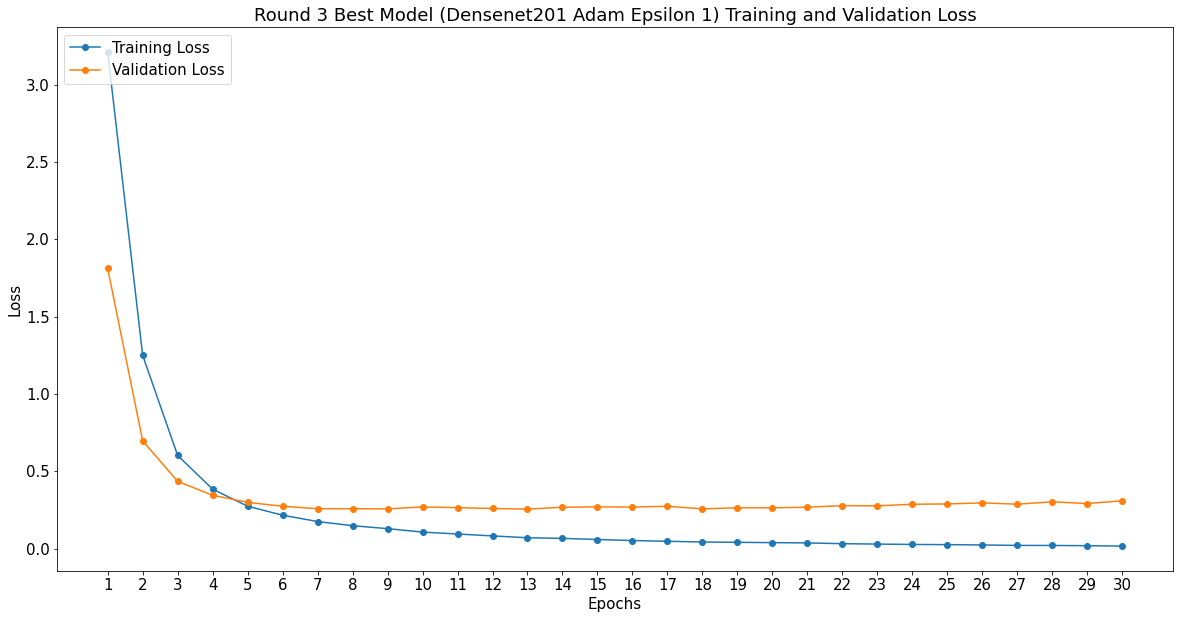

In [54]:
# Round 2 Training Loss VS Validation Loss Densenet201 
 
train_loss = np.array([3.2124,1.2509, 0.6036,0.3859,0.2756,0.2174, 0.1766, 0.1496, 0.1306, 0.1083, 0.0958,0.0837,0.0717,0.0676,0.0604,0.0536, 0.0489,0.0442,0.0422,0.0401,0.0383,0.0333,0.0308,0.0285,0.0272,0.0252,0.0222,0.0219,0.0203,0.0178]).astype(np.double)  
val_loss = np.array([1.8125,0.6981,0.4361,0.3462,0.3005,0.2753,0.2594,0.2595,0.2582,0.2711,0.2661,0.2609,0.2568,0.2690,0.2713,0.2701,0.2753,0.2583,0.2655,0.2651,0.2691,0.2791,0.2780,0.2880,0.2904,0.297,0.2887,0.3038,0.2931,0.3106 ]).astype(np.double) 

print(len(train_loss))
print(len(val_loss))
      
xlabel = [] 
for i in range(30): 
    xlabel.append(str(i+1)) 
 
 
plt.figure(figsize = (20, 10))  
plt.plot(xlabel, train_loss , "o-", label = 'Training Loss')  
plt.plot(xlabel, val_loss , "o-", label = 'Validation Loss')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend(loc="upper left")  
plt.rc('font', size=15)  
plt.title('Round 3 Best Model (Densenet201 Adam Epsilon 1) Training and Validation Loss') 
plt.show()

30
30


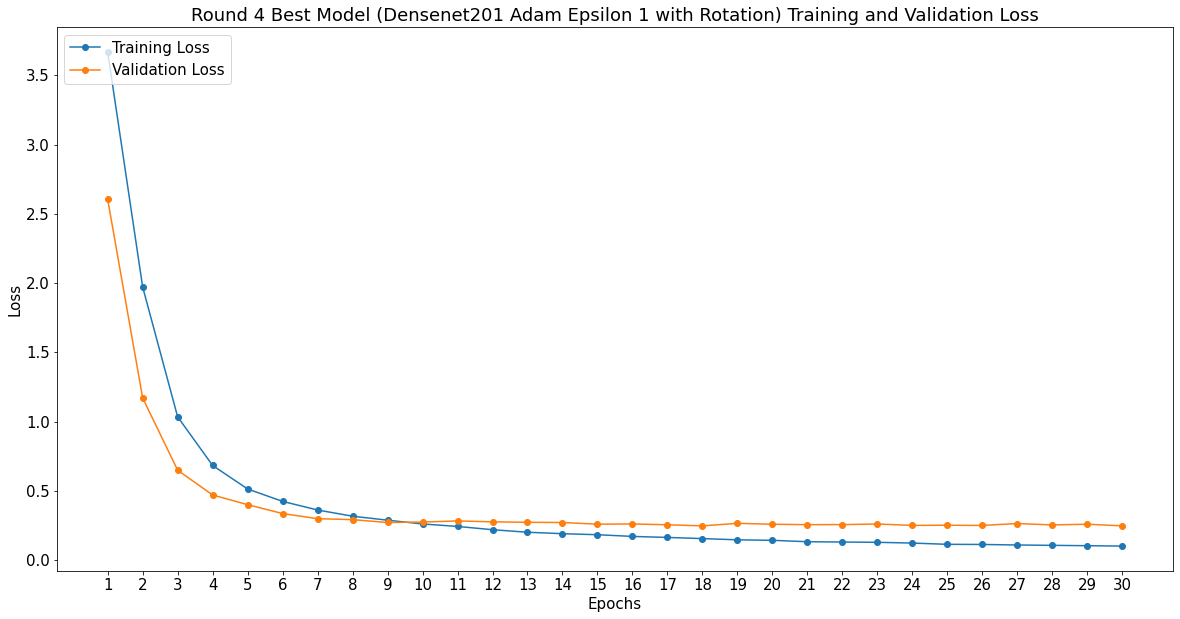

In [55]:
# Round 2 Training Loss VS Validation Loss Densenet201 
 
train_loss = np.array([3.6695,1.9717,1.0337,0.6827,0.5127,0.4231,0.3609,0.3162,0.2874,0.2601,0.2423,0.2186,0.2004,0.1898,0.1825,0.1701,0.1629,0.1545,0.1456,0.142,0.1319,0.1296,0.1276,0.1221,0.1131,0.1121,0.1082,0.1057,0.1031,0.1003]).astype(np.double)  
val_loss = np.array([2.6044,1.1701,0.6483,0.4695,0.3995,0.3353,0.2983,0.2913,0.2707,0.2740,0.2820,0.2754,0.2722,0.2706,0.2586,0.2602,0.2543,0.2463,0.2647,0.2580,0.2552,0.2554,0.2598,0.2497,0.2510,0.2494,0.2631,0.2532,0.2583, 0.2465 ]).astype(np.double) 
 
print(len(train_loss))
print(len(val_loss))
xlabel = [] 
for i in range(30): 
    xlabel.append(str(i+1)) 
 
 
plt.figure(figsize = (20, 10))  
plt.plot(xlabel, train_loss , "o-", label = 'Training Loss')  
plt.plot(xlabel, val_loss , "o-", label = 'Validation Loss')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend(loc="upper left")  
plt.rc('font', size=15)  
plt.title('Round 4 Best Model (Densenet201 Adam Epsilon 1 with Rotation) Training and Validation Loss') 
plt.show()

30
30


Text(0.5, 1.0, 'Round 2 Best Model (Densenet121 Adamax) Training and Validation Loss')

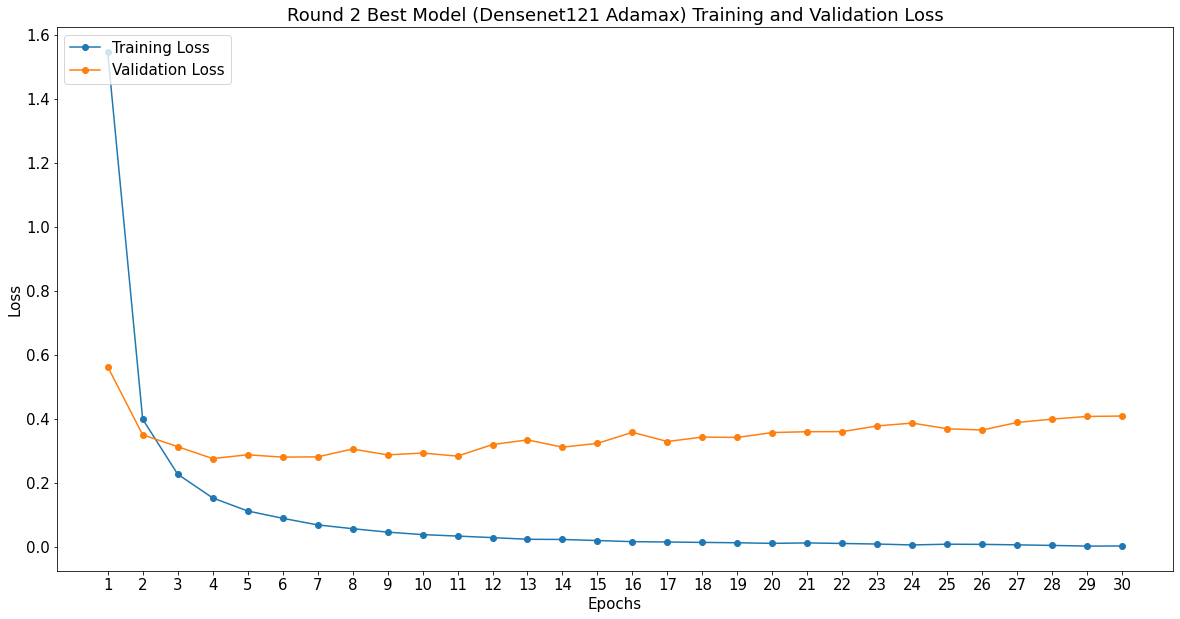

In [56]:
# Round 2 Training Loss VS Validation Loss Densenet201 
 
train_loss = np.array([1.5485,0.4006,0.2288,0.1545,0.1137,0.0908,0.0702,0.0583,0.0476,0.0398,0.0352,0.0304,0.0252,0.0246,0.0212,0.0178,0.0167,0.0154,0.0143,0.0124,0.0138,0.0121,0.0103,0.0075,0.0098,0.0093,0.0078,0.006,0.0039,0.0042]).astype(np.double)  
val_loss = np.array([0.5645,0.3517,0.3147,0.2775,0.2893,0.2820,0.2828,0.3073,0.2889,0.2947,0.2851,0.3212,0.3359,0.3131,0.3250,0.3595,0.3308,0.3446,0.3435,0.3588,0.3614,0.3617,0.3795,0.3884,0.3706,0.3667,0.3903,0.4008,0.4091,0.4104]).astype(np.double) 
 
print(len(train_loss))
print(len(val_loss))
xlabel = [] 
for i in range(30): 
    xlabel.append(str(i+1)) 
 
 
plt.figure(figsize = (20, 10))  
plt.plot(xlabel, train_loss , "o-", label = 'Training Loss')  
plt.plot(xlabel, val_loss , "o-", label = 'Validation Loss')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend(loc="upper left")  
plt.rc('font', size=15)  
plt.title('Round 2 Best Model (Densenet121 Adamax) Training and Validation Loss') 